In [3]:
import sklearn
import numpy as np

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
from sklearn import datasets, ensemble, tree
import sklearn.model_selection
import sklearn.metrics

In [6]:
data = sklearn.datasets.load_digits()

y = np.array(data.target)
X = np.array(data.data)

In [7]:
print(y.shape, X.shape)

(1797,) (1797, 64)


In [8]:
##### Task 1

classifier = tree.DecisionTreeClassifier()
accuracy = sklearn.model_selection.cross_val_score(classifier, X, y, cv=10)
print(accuracy.mean())

0.8282244912265222


In [9]:
##### Task 2

classifier = tree.DecisionTreeClassifier()
classifier_with_bagging = ensemble.BaggingClassifier(classifier, n_estimators=100)

print(sklearn.model_selection.cross_val_score(classifier_with_bagging, X, y, cv=10).mean())

0.9243093673105992


In [20]:
##### Task 3
classifier = tree.DecisionTreeClassifier()
classifier_with_bagging = ensemble.BaggingClassifier(classifier, n_estimators=100, max_features=X.shape[1])

print(sklearn.model_selection.cross_val_score(classifier_with_bagging, X, y, cv=10).mean())

0.9277085394713327


In [21]:
##### Task 4
classifier = tree.DecisionTreeClassifier(max_features='sqrt')
classifier_with_bagging = ensemble.BaggingClassifier(classifier, n_estimators=100)

print(sklearn.model_selection.cross_val_score(classifier_with_bagging, X, y, cv=10).mean())

0.9555727925167419


In [29]:
##### Task 5
classifier = ensemble.RandomForestClassifier(max_features='sqrt', n_estimators=100)

train_sizes, train_scores, test_scores = sklearn.model_selection.learning_curve(classifier, X, y, train_sizes=np.arange(0.01, 0.2, 0.05), scoring='accuracy', cv=10)

In [30]:
print(train_sizes, train_scores.mean(axis=1), test_scores.mean(axis=1))

[ 16  96 177 257] [1. 1. 1. 1.] [0.54835539 0.7588085  0.78083035 0.7853116 ]


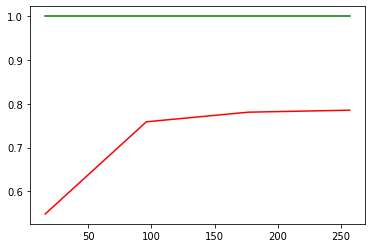

In [31]:
pyplot.plot(train_sizes, train_scores.mean(axis=1), color='green', label='o')
pyplot.plot(train_sizes, test_scores.mean(axis=1), color='red', label='o')

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=9, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


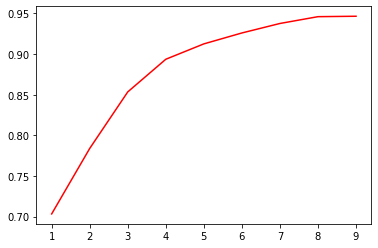

In [36]:
### Different numbers of max depth
scores = []

for x in np.arange(1, 10, 1):
    classifier = ensemble.RandomForestClassifier(max_features='sqrt', n_estimators=100, max_depth=x)
    score = sklearn.model_selection.cross_val_score(classifier, X, y, cv=10).mean()
    scores.append(score)
    
print(classifier)
pyplot.plot(np.arange(1, 10, 1), scores, color='red', label='o')



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=57, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


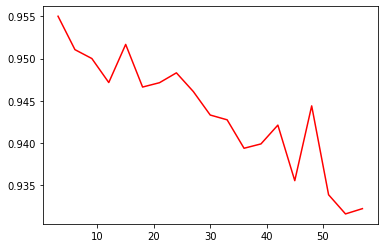

In [41]:
### Different numbers of features
scores = []

for x in np.arange(1, 20, 1):
    classifier = ensemble.RandomForestClassifier(max_features=x * 3, n_estimators=100)
    score = sklearn.model_selection.cross_val_score(classifier, X, y, cv=10).mean()
    scores.append(score)
    
print(classifier)
pyplot.plot([x * 3 for x in np.arange(1, 20, 1)], scores, color='red', label='o')